### 1. Importing libraries and data

In [36]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
import gc

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

In [37]:
# create path
path = r'C:\Users\Anna\Desktop\Data Analytics\Achievment 6\Prepared data'

In [38]:
df = pd.read_csv(os.path.join(path,'Used Cars Cleaned.CSV'))
df.head()

,Unnamed: 0,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1428,1475,Maruti,1994,45000,60000,East,Massachusetts,Braintree,Petrol,Individual,Manual,First_Owner,16.1,796,37.0,59Nm@ 2500rpm,4,Y
1,1422,1469,Maruti,1999,52000,100000,Central,Kansas,Kansas City,Petrol,Individual,Manual,First_Owner,16.1,796,37.0,59Nm@ 2500rpm,4,Y
2,171,178,Maruti,1999,40000,40000,East,District of Columbia,Washington,Petrol,Individual,Manual,Second_Owner,16.1,796,37.0,59Nm@ 2500rpm,4,Y
3,970,1000,Maruti,1999,55000,60000,Central,Michigan,Detroit,Petrol,Individual,Manual,Second_Owner,16.1,796,37.0,59Nm@ 2500rpm,4,Y
4,1828,1883,Maruti,2000,110000,70000,Central,Indiana,Lawrence,Petrol,Individual,Manual,Fourth_Above_Owner,17.3,993,60.0,78Nm@ 4500rpm,5,Y


### 02. Wrangle data

In [39]:
# creating a colunm Average selling Price
df_agg = df.copy()
df_agg["average_selling_price"] = df_agg.groupby("year").selling_price.transform("mean")
print(f"df_agg.shape (before) = {df_agg.shape}")
df_agg = df_agg.drop_duplicates(subset=["year"])
print(f"df_agg.shape (after) = {df_agg.shape}")
df_agg = df_agg[["average_selling_price", "year"]]
df_agg.tail()

df_agg.shape (before) = (2000, 20)
df_agg.shape (after) = (23, 20)


,average_selling_price,year
1159,6.989422e+05,2016
1384,9.912304e+05,2017
1640,1.088385e+06,2018
1827,1.838461e+06,2019
1981,8.862631e+05,2020


In [40]:
df_agg.sort_values(by='year', axis=0, inplace=True)

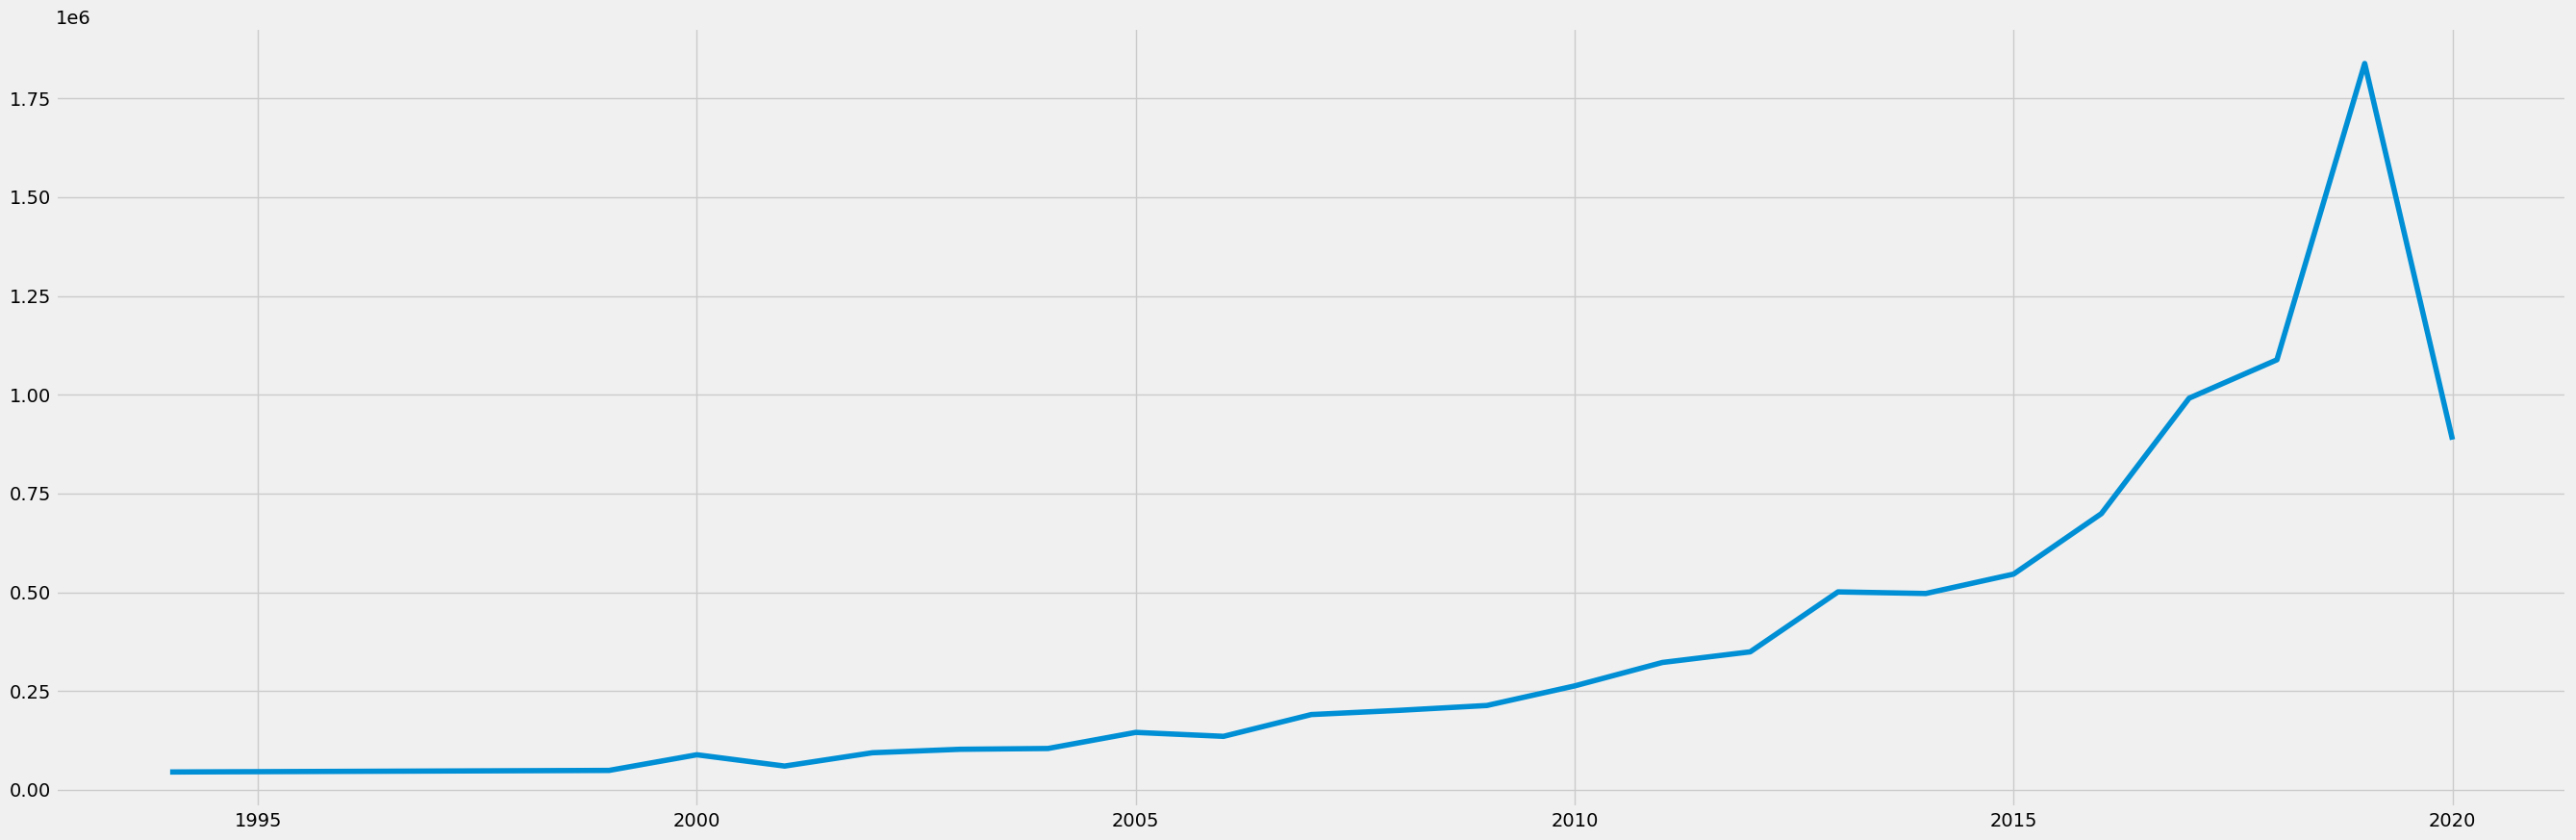

In [41]:
# Plot the data using matplotlib.

plt.figure(figsize=(30,10), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_agg.year, df_agg.average_selling_price)

The sales price fluctuation for used vehicles in the USA from 1994 to 2020 is shown in the graph above.
The market was progressively expanding, with a notable uptick in 2017–18, before seeing a drastic decline in 2019. This reduction may be attributed to COVID19 because consumers delayed unnecessary purchases in light of the pandemic situation. 

In [42]:
df_agg.head()

,average_selling_price,year
0,45000.000000,1994
1,49000.000000,1999
4,88600.000000,2000
9,60000.000000,2001
11,93714.285714,2002


In [43]:
df_agg['year'] = (pd.to_datetime(df_agg['year'].astype(str) + 'January', format='%Y%B'))
df_agg.head()

,average_selling_price,year
0,45000.000000,1994-01-01
1,49000.000000,1999-01-01
4,88600.000000,2000-01-01
9,60000.000000,2001-01-01
11,93714.285714,2002-01-01


In [44]:
df_agg['year'] = pd.to_datetime(df_agg['year'])
df_agg = df_agg.set_index('year')

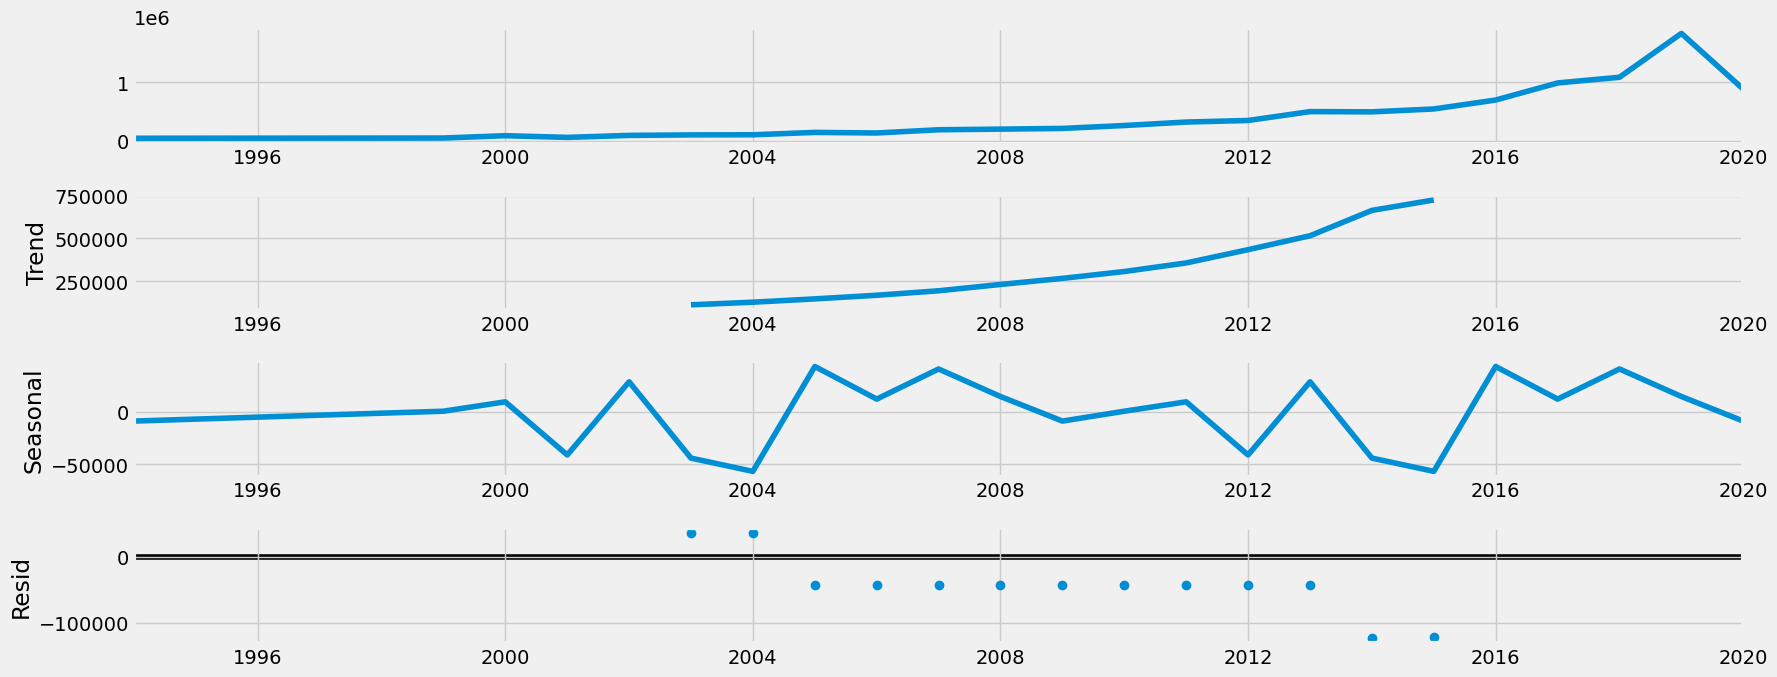

In [46]:

decomposition = sm.tsa.seasonal_decompose(df_agg, model='additive', period=int(len(df_agg)/2))

from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

decomposition.plot()
plt.show()

The general Trend is upward, whereas the Seasonality is subjected to fluctuation with downward trend from 2018-2020, nevertheless, it might be a fallibility case due to the sharp decrease in 2019 due to COVID stagnation after the long stable growth.

### 04. Testing for stationarity

In [52]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['year'])

Dickey-Fuller Stationarity test:
Test Statistic                -8.128418e+00
p-value                        1.106976e-12
Number of Lags Used            0.000000e+00
Number of Observations Used    1.999000e+03
Critical Value (1%)           -3.433625e+00
Critical Value (5%)           -2.862987e+00
Critical Value (10%)          -2.567540e+00
dtype: float64


A p-value greater than 0.05 (1.10697) means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected.

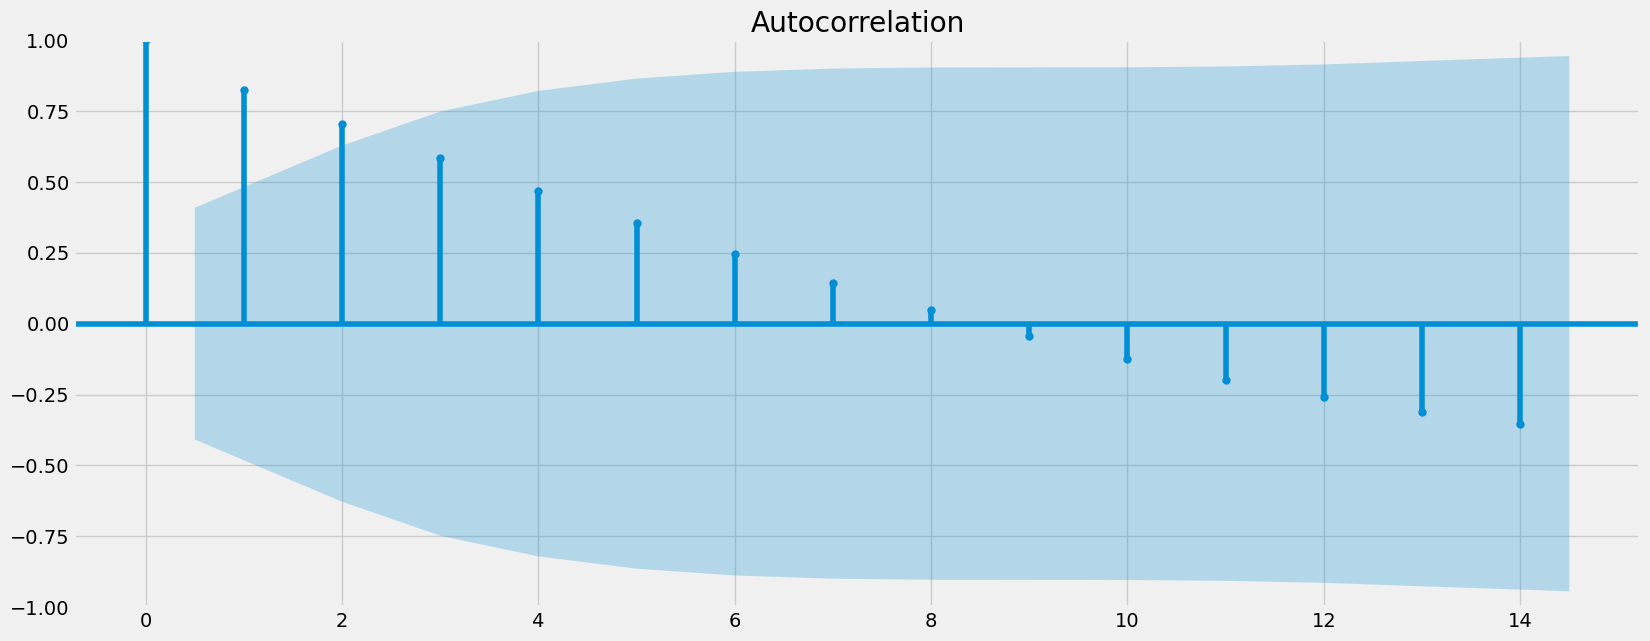

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_agg)
plt.show()